### ISH and SVM Dataset Loading

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from skimage import io, transform
from matplotlib import pyplot as plt
import os
import glob
import cv2
from PIL import Image
from torchsummary import summary
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from matplotlib.pyplot import imshow

from google.colab import drive

drive.mount('/content/drive') 

ish_spam_adv = []
ish_ham_adv = []
for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/ISH_Adversarial/ISH/SpamImages/SpamImages/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    ish_spam_adv.append(resized_image)
  except TypeError:
    continue

for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/ISH_Adversarial/ISH/NaturalImages/NaturalImages/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    ish_ham_adv.append(resized_image)
  except TypeError:
    continue

print("finished processing data")

#plt.imshow(ish_spam_adv[0])
#plt.show()

ish_spam_adv = np.asarray(ish_spam_adv)
print(ish_spam_adv.shape)
ish_ham_adv = np.asarray(ish_ham_adv)
print(ish_ham_adv.shape)

#plt.imshow(ish_spam_adv[0])
#plt.show()

ish_adversarial_dataset = np.concatenate((ish_spam_adv, ish_ham_adv))

print(ish_adversarial_dataset.shape)

#plt.imshow(ish_adversarial_dataset[0])
#plt.show()

ish_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([0])
  else:
    ish_labels.append([1]) # swapping the labels so deepdream can maximize the last layer (hopefully)

ish_labels = np.asarray(ish_labels)

x_train, x_test, y_train, y_test = train_test_split(ish_adversarial_dataset, ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

#plt.imshow(x_test[0])
print(x_test.shape)
#plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1), name="prelayer1"))
model.add(layers.MaxPooling2D((4, 4), name="prelayer2"))
model.add(layers.Conv2D(32, (7, 7), activation='relu', name="prelayer3"))
model.add(layers.MaxPooling2D((4, 4), name="prelayer4"))
model.add(layers.Conv2D(64, (7, 7), activation='relu', name='visualized_layer'))
model.add(layers.MaxPooling2D((2, 2), name = "afterlayer1"))
model.add(layers.Flatten(name = "afterlayer2"))
model.add(layers.Dropout(0.5, input_shape=(768,), name = "afterlayer3"))
model.add(layers.Dense(768, activation='relu', name = "afterlayer4"))
model.add(layers.Dropout(0.5, input_shape=(64,), name = "afterlayer5"))
model.add(layers.Dense(64, activation='relu', name = "afterlayer6"))
model.add(layers.Dense(1, activation='sigmoid', name = "afterlayer7"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

print(model.summary())


history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=70,
    validation_data=(x_val, y_val),
)

print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)

model.save('/content/cnnadv')

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 400, 1)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

print(model.summary())


history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val),
)

print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)

model.save('/content/mlpadv')


svm_spam_adv = []
svm_ham_adv = []
for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/SVM_Adversarial/spam/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    svm_spam_adv.append(resized_image)
  except TypeError:
    continue

for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/SVM_Adversarial/ham/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    svm_ham_adv.append(resized_image)
  except TypeError:
    continue

print("finished processing data")

#plt.imshow(ish_spam_adv[0])
#plt.show()

svm_spam_adv = np.asarray(svm_spam_adv)
print(svm_spam_adv.shape)
svm_ham_adv = np.asarray(svm_ham_adv)
print(svm_ham_adv.shape)

#plt.imshow(ish_spam_adv[0])
#plt.show()

svm_adversarial_dataset = np.concatenate((svm_spam_adv, svm_ham_adv))

print(svm_adversarial_dataset.shape)

svm_labels = []

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([0])
  else:
    svm_labels.append([1])

svm_labels = np.asarray(svm_labels)

x_train, x_test, y_train, y_test = train_test_split(svm_adversarial_dataset, svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

print(x_test.shape)

model = models.Sequential()
model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(32, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (7, 7), activation='relu', name = "svm_visualized_layer"))
model.add(layers.MaxPooling2D((2, 2), name="svm_1"))
model.add(layers.Flatten(name="svm_2"))
model.add(layers.Dropout(0.5, input_shape=(768,), name="svm_3"))
model.add(layers.Dense(768, activation='relu', name="svm_4"))
model.add(layers.Dense(768, activation='relu', name="svm_5"))
model.add(layers.Dense(768, activation='relu', name="svm_6"))
model.add(layers.Dropout(0.5, input_shape=(64,), name="svm_7"))
model.add(layers.Dense(64, activation='relu', name="svm_8"))
model.add(layers.Dense(1, activation='sigmoid', name="svm_9"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

print(model.summary())


history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=70,
    validation_data=(x_val, y_val),
)

print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)

model.save('/content/cnnadvsvm')

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 400, 1)),
    keras.layers.Flatten(input_shape=(400, 400, 1)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

print(model.summary())


history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val),
)

print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)

model.save('/content/mlpadvsvm')

# swapping the labels so deepdream can maximize the last layer (hopefully)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
finished processing data
(887, 400, 400, 1)
(784, 400, 400, 1)
(1671, 400, 400, 1)
(251, 400, 400, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prelayer1 (Conv2D)           (None, 394, 394, 32)      1600      
_________________________________________________________________
prelayer2 (MaxPooling2D)     (None, 98, 98, 32)        0         
____________

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7efcd60dc268> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7efcd4fca7b8> (for post_execute):


KeyboardInterrupt: ignored

## DeepDream

In [ ]:
import time

In [ ]:
# loading models 
import IPython.display as display
import PIL.Image
import matplotlib as mpl

cnnadv = tf.keras.models.load_model('/content/cnnadv')
cnnadv.trainable = False
cnnadvsvm = tf.keras.models.load_model('/content/cnnadvsvm')
cnnadvsvm.trainable = False

In [ ]:
# choosing an image to dreamify just to test
# Display an image
def show(img):
  img2 = cv2.merge((np.array(img), np.array(img), np.array(img)))
  #img = np.array(img).reshape(400, 400)
  plt.imshow(img2)
  #display.display(PIL.Image.fromarray(img))

def deprocess(img):
  img = img*255
  return tf.cast(img, tf.uint8)


In [ ]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)

In [ ]:
class DeepDream(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,1], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  def __call__(self, img, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
          tape.watch(img)
          loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
        gradients = tape.gradient(loss, img)

        # Normalize the gradients.
        gradients /= tf.math.reduce_std(gradients) + 1e-8 
        
        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
        img = img + gradients*step_size
        img = tf.clip_by_value(img, 0, 255)

      return loss, img

deepdream = DeepDream(dream_model)

In [ ]:
def run_deep_dream_simple(img, steps=100, step_size=0.01):
  img = tf.convert_to_tensor(img)
  img = tf.cast(img, tf.float32) # added this line to satisfy signature thing
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining>100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(img, run_steps, tf.constant(step_size))
    
    display.clear_output(wait=True)
    show(deprocess(img))
    print ("Step {}, loss {}".format(step, loss))


  result = deprocess(img)
  display.clear_output(wait=True)
  show(result)

  return result

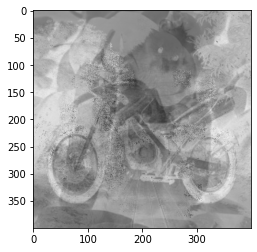

In [ ]:
import time


def generate_natural_perturbation(batch_size, dataset):
  perturbation_list = []
  for i in range(0, int(len(dataset)/batch_size)):
    print("iteration " + str(i))
    dreams = []
    for index in range(batch_size*i, batch_size*(i+1)):
      dream_img = run_deep_dream_simple(img=dataset[index], 
                                      steps=64, step_size=0.001) # originally 0.001
      dreams.append(np.array(dream_img))

    constant = 1.0/batch_size

    blended_image = dreams[0]*constant

    for index, ii in enumerate(dreams):
      if(index == 0):
        continue
      weighted = ii*constant
      blended_image = blended_image + weighted

    plt.imshow(cv2.merge((blended_image/255, blended_image/255, blended_image/255)))
    plt.show()
    perturbation_list.append(blended_image)
  return perturbation_list

base_model = cnnadv

# choosing layers to maximize
names = ['visualized_layer', 'afterlayer6', 'afterlayer7']
layerss = [base_model.get_layer(name).output for name in names]

dream_model = tf.keras.Model(inputs=base_model.input, outputs=layerss)
    
perturbation_list = generate_natural_perturbation(4, ish_ham_adv)



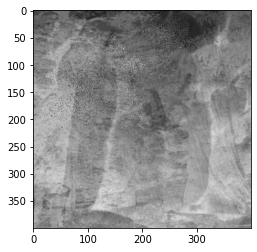

In [ ]:
base_model = cnnadvsvm

# choosing layers to maximize
names = ['svm_visualized_layer', 'svm_8', 'svm_9']
layerss = [base_model.get_layer(name).output for name in names]

dream_model = tf.keras.Model(inputs=base_model.input, outputs=layerss)

deepdream = DeepDream(dream_model)

svm_perturbation_list = generate_natural_perturbation(4, svm_ham_adv)

In [ ]:
print(len(perturbation_list))
print(len(svm_perturbation_list))

196
196


In [ ]:
# eh this is probably the result of weird/incorrect conversions or casting

# fuck it, this can probably work (fix inversion if possible)


# credits for deepdream: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/deepdream.ipynb#scrollTo=yB9pTqn6xfuK 

## Grad CAM

In [ ]:
ish_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([1, 0])
  else:
    ish_labels.append([0, 1]) 

ish_labels = np.asarray(ish_labels)

x_train, x_test, y_train, y_test = train_test_split(ish_adversarial_dataset, ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

#plt.imshow(x_test[0])
print(x_test.shape)
#plt.show()

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1)))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(32, (7, 7), activation='relu'))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (7, 7), activation='relu', name='visualized_layer'))
model1.add(layers.MaxPooling2D((2, 2), name="afterlayerr1"))
model1.add(layers.Flatten(name="afterlayerr2"))
model1.add(layers.Dropout(0.5, input_shape=(768,), name="afterlayerr3"))
model1.add(layers.Dense(768, activation='relu', name="afterlayerr4"))
model1.add(layers.Dropout(0.5, input_shape=(64,), name="afterlayerr5"))
model1.add(layers.Dense(64, activation='relu', name="afterlayerr6"))
model1.add(layers.Dense(2, activation='softmax', name='predictions'))

model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

print(model1.summary())


history1 = model1.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=70,
    validation_data=(x_val, y_val),
)

svm_labels = []

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([1, 0])
  else:
    svm_labels.append([0, 1])

svm_labels = np.asarray(svm_labels)

x_train, x_test, y_train, y_test = train_test_split(svm_adversarial_dataset, svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

print(x_test.shape)

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1)))
model2.add(layers.MaxPooling2D((4, 4)))
model2.add(layers.Conv2D(32, (7, 7), activation='relu'))
model2.add(layers.MaxPooling2D((4, 4)))
model2.add(layers.Conv2D(64, (7, 7), activation='relu', name = "svm_visualized_layer"))
model2.add(layers.MaxPooling2D((2, 2), name="svm_1"))
model2.add(layers.Flatten(name="svm_2"))
model2.add(layers.Dropout(0.5, input_shape=(768,), name="svm_3"))
model2.add(layers.Dense(768, activation='relu', name="svm_4"))
model2.add(layers.Dense(768, activation='relu', name="svm_5"))
model2.add(layers.Dense(768, activation='relu', name="svm_6"))
model2.add(layers.Dropout(0.5, input_shape=(64,), name="svm_7"))
model2.add(layers.Dense(64, activation='relu', name="svm_8"))
model2.add(layers.Dense(2, activation='softmax', name="svm_9"))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

print(model2.summary())

history2 = model2.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=70,
    validation_data=(x_val, y_val),
)


(251, 400, 400, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 394, 394, 32)      1600      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 32)        50208     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
visualized_layer (Conv2D)    (None, 17, 17, 64)        100416    
_________________________________________________________________
afterlayerr1 (MaxPooling2D)  (None, 8, 8, 64)          0         
_________________________________________________________________
afterlayerr2 (Flatten)       (None,

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
img_size = (400, 400)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

In [ ]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
# uh here's the process: gen hm for spam -> convert heatmap to b&w -> somehow "subtract" that from the spam image such that the regions where the binary heatmap was 1 are white 
# -> superimpose the natural perturbation onto the resulting image -> superimpose the universal perturbation

# parameters: spam image, natural perturbation, model, last_conv_layer_name, classifier_layer_names

def generate_spam_image_with_natural_pert(spam_image, natural_perturbation, model, last_conv_layer_name, classifier_layer_names):
  assert spam_image.shape == (1, 400, 400, 1)
  assert natural_perturbation.shape == (400, 400, 1)
  heatmap = make_gradcam_heatmap(
    spam_image, model, last_conv_layer_name, classifier_layer_names
  )
  #plt.imshow(heatmap)
  #plt.show()
  plt_image = cv2.merge((spam_image[0], spam_image[0], spam_image[0]))
  #print('pltimageshape')
  #print(plt_image.shape)
  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((plt_image.shape[1], plt_image.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
  heatmap_gray = cv2.cvtColor(jet_heatmap/255, cv2.COLOR_BGR2GRAY)
  heatmap_gray = heatmap_gray.astype('float64')

  # formatting to uint8, 0-255 to satisfy cv2
  natural = natural_perturbation
  natural = natural.astype(np.uint8)*255

  # formatting to uint8, 0-255 to satisfy cv2
  heatmap_gray = np.expand_dims(heatmap_gray, axis=-1)
  heatmap_gray = heatmap_gray*255
  heatmap_gray = heatmap_gray.astype(np.uint8)
  #print("heatmapgray")
  #print(heatmap_gray.shape)
  #plt.imshow(cv2.merge((heatmap_gray, heatmap_gray, heatmap_gray)), cmap='gray')
  #plt.show()
  # creating a binary version of the gray heatmap
  (thresh, heatmap_bw) = cv2.threshold(heatmap_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  heatmap_bw = cv2.bitwise_not(heatmap_bw)

  #print(natural.shape)
  #print(heatmap_bw.shape)
  replaced_image = cv2.bitwise_and(natural,natural,mask = heatmap_bw)
  spam_w_natural = cv2.addWeighted(replaced_image, 0.35, spam_image[0], 0.65, 0.0)
  #plt.imshow(spam_w_natural, cmap='gray')
  #plt.show()
  return spam_w_natural

ish_last_conv_layer_name = "visualized_layer"

ish_classifier_layer_names = [
    "afterlayerr1",
    "afterlayerr2",
    "afterlayerr3",
    "afterlayerr4",
    "afterlayerr5",
    "afterlayerr6",
    "predictions"
]

svm_last_conv_layer_name = "svm_visualized_layer"

svm_classifier_layer_names = [
    "svm_1",
    "svm_2",
    "svm_3",
    "svm_4",
    "svm_5",
    "svm_6",
    "svm_7",
    "svm_8",
    "svm_9"
]

test_image = np.expand_dims(ish_spam_adv[6], axis=0)
print(test_image.shape)
generate_spam_image_with_natural_pert(test_image, perturbation_list[0], model1, ish_last_conv_layer_name, ish_classifier_layer_names)


ish_new_spam = []
svm_new_spam = []
perturbation_list1 = perturbation_list + perturbation_list + perturbation_list + perturbation_list + perturbation_list
svm_perturbation_list1 = svm_perturbation_list + svm_perturbation_list + svm_perturbation_list + svm_perturbation_list + svm_perturbation_list
print(len(ish_spam_adv))
print(len(svm_spam_adv))
print(len(perturbation_list1))
print(len(svm_perturbation_list1))

start_time = time.time()
for index, image in enumerate(ish_spam_adv):
  test_image = np.expand_dims(image, axis=0)
  ish_new_spam.append(generate_spam_image_with_natural_pert(test_image, perturbation_list1[index], model1, ish_last_conv_layer_name, ish_classifier_layer_names))
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
for index, image in enumerate(svm_spam_adv):
  test_image = np.expand_dims(image, axis=0)
  svm_new_spam.append(generate_spam_image_with_natural_pert(test_image, svm_perturbation_list1[index], model2, svm_last_conv_layer_name, svm_classifier_layer_names))
print("--- %s seconds ---" % (time.time() - start_time))


(1, 400, 400, 1)
887
810
980
980


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


--- 45.356675148010254 seconds ---
--- 59.85917544364929 seconds ---


In [ ]:
print(len(ish_spam_adv))
print(len(svm_spam_adv))

887
810


In [ ]:
for index, image in enumerate(ish_new_spam):
  cv2.imwrite('ish_new_spam/img' + str(index) + '.jpg', image)

for index, image in enumerate(svm_new_spam):
  cv2.imwrite('svm_new_spam/img' + str(index) + '.jpg', image)

In [ ]:
print(len(ish_new_spam))
print(len(svm_new_spam))

887
810


In [ ]:
from google.colab import files
!zip -r /content/ish_new_spam.zip /content/ish_new_spam
files.download('/content/ish_new_spam.zip')

!zip -r /content/svm_new_spam.zip /content/svm_new_spam
files.download('/content/svm_new_spam.zip')

  adding: content/ish_new_spam/ (stored 0%)
  adding: content/ish_new_spam/img229.jpg (deflated 0%)
  adding: content/ish_new_spam/img673.jpg (deflated 0%)
  adding: content/ish_new_spam/img856.jpg (deflated 5%)
  adding: content/ish_new_spam/img872.jpg (deflated 0%)
  adding: content/ish_new_spam/img780.jpg (deflated 0%)
  adding: content/ish_new_spam/img694.jpg (deflated 0%)
  adding: content/ish_new_spam/img755.jpg (deflated 0%)
  adding: content/ish_new_spam/img275.jpg (deflated 0%)
  adding: content/ish_new_spam/img45.jpg (deflated 0%)
  adding: content/ish_new_spam/img818.jpg (deflated 0%)
  adding: content/ish_new_spam/img723.jpg (deflated 0%)
  adding: content/ish_new_spam/img32.jpg (deflated 0%)
  adding: content/ish_new_spam/img334.jpg (deflated 0%)
  adding: content/ish_new_spam/img424.jpg (deflated 0%)
  adding: content/ish_new_spam/img180.jpg (deflated 0%)
  adding: content/ish_new_spam/img89.jpg (deflated 0%)
  adding: content/ish_new_spam/img880.jpg (deflated 0%)
  addin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/svm_new_spam/ (stored 0%)
  adding: content/svm_new_spam/img229.jpg (deflated 0%)
  adding: content/svm_new_spam/img673.jpg (deflated 0%)
  adding: content/svm_new_spam/img780.jpg (deflated 0%)
  adding: content/svm_new_spam/img694.jpg (deflated 0%)
  adding: content/svm_new_spam/img755.jpg (deflated 0%)
  adding: content/svm_new_spam/img275.jpg (deflated 0%)
  adding: content/svm_new_spam/img45.jpg (deflated 1%)
  adding: content/svm_new_spam/img723.jpg (deflated 0%)
  adding: content/svm_new_spam/img32.jpg (deflated 0%)
  adding: content/svm_new_spam/img334.jpg (deflated 0%)
  adding: content/svm_new_spam/img424.jpg (deflated 0%)
  adding: content/svm_new_spam/img180.jpg (deflated 0%)
  adding: content/svm_new_spam/img89.jpg (deflated 0%)
  adding: content/svm_new_spam/img67.jpg (deflated 0%)
  adding: content/svm_new_spam/img569.jpg (deflated 0%)
  adding: content/svm_new_spam/img11.jpg (deflated 0%)
  adding: content/svm_new_spam/img545.jpg (deflated 0%)
  adding:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluation

### Dependencies

In [ ]:
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 655kB 2.8MB/s 
     |████████████████████████████████| 7.1MB 9.3MB/s 
     |████████████████████████████████| 20.8MB 1.3MB/s 
     |████████████████████████████████| 235kB 65.7MB/s 
     |████████████████████████████████| 747kB 66.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from skimage import io, transform
from matplotlib import pyplot as plt
from PIL import Image
from torchsummary import summary
from matplotlib.pyplot import imshow
import cv2
import os
import glob
import statistics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
import time
from sklearn.metrics import auc
from tensorflow import keras
from keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import time
import tensorflow as tf
%matplotlib inline
def auto_canny(image, sigma=0.33):
  image = (image*255).astype(np.uint8)
  v = np.median(image)
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  return edged

def join(ax, files):
    data = [np.load(filename) for filename in files]
    for datum in data:
        method = getattr(ax, datum['method'].item())
        args = tuple(datum['args'])
        kwargs = datum['kwargs'].item()
        method(*args, **kwargs)

def l2(orig, adv):
  assert orig.shape == adv.shape, str(orig.shape+adv.shape)
  return np.linalg.norm(adv-orig)

### Model and Dataset Loading

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cnn.zip to cnn.zip
Saving mlpsvm.zip to mlpsvm.zip
Saving cnnsvm.zip to cnnsvm.zip
Saving mlp.zip to mlp.zip
User uploaded file "cnn.zip" with length 7566131 bytes
User uploaded file "mlpsvm.zip" with length 5497820 bytes
User uploaded file "cnnsvm.zip" with length 7525374 bytes
User uploaded file "mlp.zip" with length 5491701 bytes


In [ ]:
!unzip cnn.zip
!unzip mlp.zip
!unzip cnnsvm.zip
!unzip mlpsvm.zip

Archive:  cnn.zip
   creating: content/cnn/
   creating: content/cnn/assets/
  inflating: content/cnn/saved_model.pb  
   creating: content/cnn/variables/
  inflating: content/cnn/variables/variables.data-00001-of-00002  
  inflating: content/cnn/variables/variables.index  
  inflating: content/cnn/variables/variables.data-00000-of-00002  
Archive:  mlp.zip
   creating: content/mlp/
   creating: content/mlp/assets/
  inflating: content/mlp/saved_model.pb  
   creating: content/mlp/variables/
  inflating: content/mlp/variables/variables.data-00001-of-00002  
  inflating: content/mlp/variables/variables.index  
  inflating: content/mlp/variables/variables.data-00000-of-00002  
Archive:  cnnsvm.zip
   creating: content/cnnsvm/
   creating: content/cnnsvm/assets/
  inflating: content/cnnsvm/saved_model.pb  
   creating: content/cnnsvm/variables/
  inflating: content/cnnsvm/variables/variables.data-00001-of-00002  
  inflating: content/cnnsvm/variables/variables.index  
  inflating: content

In [ ]:
cnn = tf.keras.models.load_model('/content/content/cnn')
cnn.trainable = False
mlp = tf.keras.models.load_model('/content/content/mlp')
mlp.trainable = False
cnnsvm = tf.keras.models.load_model('/content/content/cnnsvm')
cnnsvm.trainable = False 
mlpsvm = tf.keras.models.load_model('/content/content/mlpsvm')
mlpsvm.trainable = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
finished processing data
(887, 400, 400, 1)
(784, 400, 400, 1)
(1671, 400, 400, 1)
finished processing data
(810, 400, 400, 1)
(784, 400, 400, 1)
(1594, 400, 400, 1)


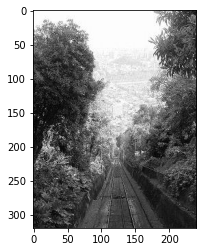

In [ ]:
from google.colab import drive

drive.mount('/content/drive') # Afterward, your Drive files will be mounted and you can browse them with the file browser in the side panel.

ish_spam_adv = []
ish_ham_adv = []
for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/ISH_Adversarial/ISH/ish_new_spam/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    ish_spam_adv.append(resized_image)
  except TypeError:
    continue

for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/ISH_Adversarial/ISH/NaturalImages/NaturalImages/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    ish_ham_adv.append(resized_image)
  except TypeError:
    continue

print("finished processing data")

#plt.imshow(ish_spam_adv[0])
#plt.show()

ish_spam_adv = np.asarray(ish_spam_adv)
print(ish_spam_adv.shape)
ish_ham_adv = np.asarray(ish_ham_adv)
print(ish_ham_adv.shape)

#plt.imshow(ish_spam_adv[0])
#plt.show()

ish_adversarial_dataset = np.concatenate((ish_spam_adv, ish_ham_adv))

print(ish_adversarial_dataset.shape)

#plt.imshow(ish_adversarial_dataset[0])
#plt.show()

ish_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([1])
  else:
    ish_labels.append([0])

ish_labels = np.asarray(ish_labels)


svm_spam_adv = []
svm_ham_adv = []
for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/SVM_Adversarial/svm_new_spam/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    svm_spam_adv.append(resized_image)
  except TypeError:
    continue

for imagePath in glob.glob("/content/drive/My Drive/Research_Datasets/SVM_Adversarial/ham/" + "/*.jpg"):
  #print(imagePath)
  image = cv2.imread(imagePath)
  try:
    plt.imshow(image)
    resized_image = cv2.resize(image, (400, 400))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_image = resized_image[:, :, np.newaxis]
    svm_ham_adv.append(resized_image)
  except TypeError:
    continue

print("finished processing data")

#plt.imshow(ish_spam_adv[0])
#plt.show()

svm_spam_adv = np.asarray(svm_spam_adv)
print(svm_spam_adv.shape)
svm_ham_adv = np.asarray(svm_ham_adv)
print(svm_ham_adv.shape)

#plt.imshow(ish_spam_adv[0])
#plt.show()

svm_adversarial_dataset = np.concatenate((svm_spam_adv, svm_ham_adv))

print(svm_adversarial_dataset.shape)

svm_labels = []

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([1])
  else:
    svm_labels.append([0])

svm_labels = np.asarray(svm_labels)

finished ish_spam
finished ish_natural
finished svm_spam


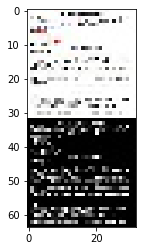

finished svm_ham


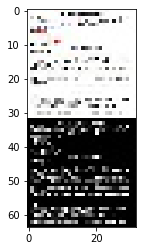

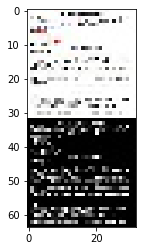

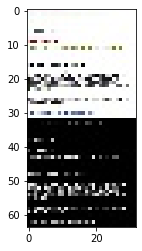

ish shape: (1671, 64, 32, 3)
svm shape: (1594, 64, 32, 3)
ish_labels shape: (1671, 1)
svm_labels shape: (1594, 1)


In [ ]:
ish_spam_path = "/content/drive/My Drive/Research_Datasets/ISH/SpamImages/"

ish_natural_path = "/content/drive/My Drive/Research_Datasets/ISH/NaturalImages/"

svm_spam_path = "/content/drive/My Drive/Research_Datasets/SVM/spam/"

svm_ham_path = "/content/drive/My Drive/Research_Datasets/SVM/ham/"

images = os.listdir(ish_spam_path)
images2 = os.listdir(ish_natural_path)
images3 = os.listdir(svm_spam_path)
images4 = os.listdir(svm_ham_path)

ish_spam = []
for image in images: 
    im = Image.open(ish_spam_path + image)
    ish_spam.append(np.asarray(im))

print("finished ish_spam")

ish_natural = []
for image in images2: # WARNING: SOME IMAGES WERE APPARENTLY NOT CONVERTED BY THE OTHER NOTEBOOK
    im = Image.open(ish_natural_path + image)
    ish_natural.append(np.asarray(im))

print("finished ish_natural")

svm_spam = []
for image in images3: # WARNING: SOME IMAGES WERE APPARENTLY NOT CONVERTED BY THE OTHER NOTEBOOK
    im = Image.open(svm_spam_path + image)
    svm_spam.append(np.asarray(im))

print("finished svm_spam")

svm_ham = []
for image in images4: # WARNING: SOME IMAGES WERE APPARENTLY NOT CONVERTED BY THE OTHER NOTEBOOK
    im = Image.open(svm_ham_path + image)
    svm_ham.append(np.asarray(im))

plt.imshow(ish_spam[0])
plt.show()

print("finished svm_ham")

ish_spam.extend(ish_natural)

ish_dataset = ish_spam.copy()

plt.imshow(ish_dataset[0])
plt.show()

svm_spam.extend(svm_ham)

svm_dataset = svm_spam.copy()

ish_labels = []
svm_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([1])
  else:
    ish_labels.append([0])

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([1])
  else:
    svm_labels.append([0])


plt.imshow(ish_dataset[0])
plt.show()

plt.imshow(ish_dataset[2])
plt.show()


np_ish_dataset = np.asarray(ish_dataset)
np_svm_dataset = np.asarray(svm_dataset)
np_ish_labels = np.asarray(ish_labels)
np_svm_labels = np.asarray(svm_labels)

print("ish shape: " + str(np_ish_dataset.shape))
print("svm shape: " + str(np_svm_dataset.shape))
print("ish_labels shape: " + str(np_ish_labels.shape))
print("svm_labels shape: " + str(np_svm_labels.shape))

### MLP ISH

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

from art.attacks.evasion import UniversalPerturbation
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

ish_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([1])
  else:
    ish_labels.append([0])

ish_labels = np.asarray(ish_labels)

x_train, x_test, y_train, y_test = train_test_split(ish_adversarial_dataset, ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

y_train_new = []
y_test_new = []

# modifying y to be one-hot
for index, i in enumerate(y_train):
  if(int(i) == 1):
    y_train_new.append([0, 1])
  else:
    y_train_new.append([1, 0])

for index, i in enumerate(y_test):
  if(int(i) == 1):
    y_test_new.append([0, 1])
  else:
    y_test_new.append([1, 0]) 

y_train_new = np.asarray(y_train_new)
y_test_new = np.asarray(y_test_new)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test_new = y_test_new.astype(np.float32)
y_train_new = y_train_new.astype(np.float32)
# Step 2: Create the model
min_pixel_value = float(0)
max_pixel_value = float(255)
model = Sequential()
model.add(Flatten(input_shape=(400, 400, 1)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)
# Step 4: Train the ART classifier

classifier.fit(x_train, y_train_new, batch_size=64, nb_epochs=70)

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = UniversalPerturbation(classifier, attacker="fgsm", attacker_params={"eps" : 50}, delta=0.0, max_iter=250, eps=64, norm=np.inf) # using fgsm for now, this has more params you can play with
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))



# if you get ValueError: Calling `Model.predict` in graph mode is (...), just rerun the cell after the art import



Epoch 1/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.4865 - accuracy: 0.4592
Epoch 2/70
18/18 [==============================] - 1s 47ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.7586 - accuracy: 0.4566
Epoch 3/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.7446 - accuracy: 0.4575
Epoch 4/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.7166 - accuracy: 0.4592
Epoch 5/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.7866 - accuracy: 0.4549
Epoch 6/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.7726 - accuracy: 0.4557
Epoch 7/70
18/18 [==============================] - 1s 47ms/step - batch: 8.5000 - size: 64.0000 - loss: 8.6187 - accuracy: 0.4653
Epoch 8/70
18/18 [==============================] - 1s 48ms/step - batch: 8.5000 - 


Universal perturbation: 0it [00:00, ?it/s]
Universal perturbation: 1it [00:06,  6.56s/it]
Universal perturbation: 2it [00:14,  6.90s/it]
Universal perturbation: 3it [00:21,  7.14s/it]
Universal perturbation: 4it [00:29,  7.31s/it]
Universal perturbation: 5it [00:37,  7.45s/it]
Universal perturbation: 6it [00:45,  7.54s/it]
Universal perturbation: 7it [00:53,  7.66s/it]
Universal perturbation: 8it [01:01,  7.74s/it]
Universal perturbation: 9it [01:08,  7.79s/it]
Universal perturbation: 10it [01:16,  7.81s/it]
Universal perturbation: 11it [01:24,  7.81s/it]
Universal perturbation: 12it [01:32,  7.77s/it]
Universal perturbation: 13it [01:40,  7.78s/it]
Universal perturbation: 14it [01:47,  7.74s/it]
Universal perturbation: 15it [01:55,  7.73s/it]
Universal perturbation: 16it [02:03,  7.72s/it]
Universal perturbation: 17it [02:10,  7.70s/it]
Universal perturbation: 18it [02:18,  7.68s/it]
Universal perturbation: 19it [02:26,  7.67s/it]
Universal perturbation: 20it [02:33,  7.67s/it]
Unive

Accuracy on adversarial test examples: 100.0%


In [ ]:
for index, image in enumerate(x_test):
  cv2.imwrite('ish_adversarial/img' + str(index) + '.jpg', image)

from google.colab import files

!zip -r /content/ish_adversarial.zip /content/ish_adversarial
files.download('/content/ish_adversarial.zip')

  adding: content/ish_adversarial/ (stored 0%)
  adding: content/ish_adversarial/img50.jpg (deflated 0%)
  adding: content/ish_adversarial/img80.jpg (deflated 1%)
  adding: content/ish_adversarial/img142.jpg (deflated 0%)
  adding: content/ish_adversarial/img163.jpg (deflated 1%)
  adding: content/ish_adversarial/img1.jpg (deflated 0%)
  adding: content/ish_adversarial/img133.jpg (deflated 1%)
  adding: content/ish_adversarial/img149.jpg (deflated 0%)
  adding: content/ish_adversarial/img61.jpg (deflated 0%)
  adding: content/ish_adversarial/img202.jpg (deflated 0%)
  adding: content/ish_adversarial/img229.jpg (deflated 0%)
  adding: content/ish_adversarial/img76.jpg (deflated 0%)
  adding: content/ish_adversarial/img24.jpg (deflated 1%)
  adding: content/ish_adversarial/img82.jpg (deflated 0%)
  adding: content/ish_adversarial/img18.jpg (deflated 0%)
  adding: content/ish_adversarial/img68.jpg (deflated 0%)
  adding: content/ish_adversarial/img191.jpg (deflated 0%)
  adding: content/i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

average accuracy on adversarial examples: 0.8019672885947121
average l2 distance: 11011.829


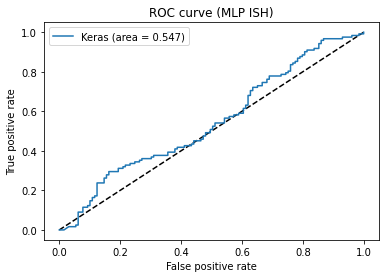

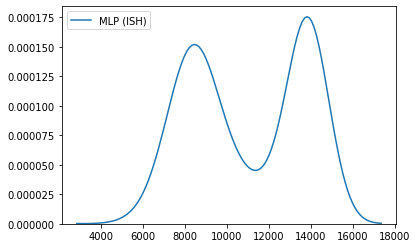

In [ ]:
# loading the original ISH dataset for l2 distance calculation
x_train, x_test, y_train, y_test = train_test_split(np_ish_dataset, np_ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# calculating accuracy and l2 distance
predictions = []
x_test_adv_formatted = []
distances = []
for index, i in enumerate(x_test_adv):
  im = i/255
  rgb = cv2.merge((im,im,im)) # converting (400, 400, 1) to (400, 400, 3)
  #plt.imshow(rgb)
  #plt.show()
  rgb = rgb.astype(np.float32)
  gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  auto = auto_canny(blurred)
  auto_3d = np.stack((auto,)*3, axis=-1)
  resized_image = cv2.resize(rgb, (32, 32))
  resized_auto_3d = cv2.resize(auto_3d,(32, 32))
  final_test_image = np.concatenate((resized_image, resized_auto_3d), axis=0)
  final_test_image = final_test_image[None, ...]
  #print("prediction: " + str(cnn.predict(final_test_image)))
  prediction = mlp.predict(final_test_image)
  predictions.append(float(prediction))
  x_test_adv_formatted.append(final_test_image[0])
  distance = l2(x_test[index], final_test_image[0])
  distances.append(distance)


print("average accuracy on adversarial examples: " + str(statistics.mean(predictions)))
print("average l2 distance: " + str(statistics.mean(distances)))

# ROC Curve
x_test_adv_formatted = np.array(x_test_adv_formatted)
y_pred_keras = cnn.predict(x_test_adv_formatted).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (MLP ISH)')
plt.legend(loc='best')
plt.show()

g = sns.kdeplot(distances, label="MLP (ISH)")
g.legend()
#np.savez('/content/mlpish.npz', method='plot', args=(distances), kwargs=dict())

### CNN ISH

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

from art.attacks.evasion import UniversalPerturbation
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

ish_labels = []

for i in range(0, 1671):
  if(i <= 887):
    ish_labels.append([1])
  else:
    ish_labels.append([0])

ish_labels = np.asarray(ish_labels)

x_train, x_test, y_train, y_test = train_test_split(ish_adversarial_dataset, ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

y_train_new = []
y_test_new = []

# modifying y to be one-hot
for index, i in enumerate(y_train):
  if(int(i) == 1):
    y_train_new.append([0, 1])
  else:
    y_train_new.append([1, 0])

for index, i in enumerate(y_test):
  if(int(i) == 1):
    y_test_new.append([0, 1])
  else:
    y_test_new.append([1, 0]) 

y_train_new = np.asarray(y_train_new)
y_test_new = np.asarray(y_test_new)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test_new = y_test_new.astype(np.float32)
y_train_new = y_train_new.astype(np.float32)
# Step 2: Create the model
min_pixel_value = float(0)
max_pixel_value = float(255)
model = Sequential()
model.add(Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1)))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5, input_shape=(768,)))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.5, input_shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)
# Step 4: Train the ART classifier

classifier.fit(x_train, y_train_new, batch_size=64, nb_epochs=70)

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = UniversalPerturbation(classifier, attacker="fgsm", attacker_params={"eps" : 50}, delta=0.0, max_iter=250, eps=64, norm=np.inf) # using fgsm for now, this has more params you can play with
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))






Epoch 1/70
18/18 [==============================] - 3s 146ms/step - loss: 17.7068 - accuracy: 0.5321
Epoch 2/70
18/18 [==============================] - 2s 138ms/step - loss: 0.7078 - accuracy: 0.6997
Epoch 3/70
18/18 [==============================] - 3s 140ms/step - loss: 0.5771 - accuracy: 0.7474
Epoch 4/70
18/18 [==============================] - 2s 138ms/step - loss: 0.2985 - accuracy: 0.9062
Epoch 5/70
18/18 [==============================] - 2s 138ms/step - loss: 0.1956 - accuracy: 0.9401
Epoch 6/70
18/18 [==============================] - 2s 138ms/step - loss: 0.1158 - accuracy: 0.9670
Epoch 7/70
18/18 [==============================] - 2s 138ms/step - loss: 0.1012 - accuracy: 0.9722
Epoch 8/70
18/18 [==============================] - 2s 138ms/step - loss: 0.1938 - accuracy: 0.9332
Epoch 9/70
18/18 [==============================] - 2s 139ms/step - loss: 0.1728 - accuracy: 0.9375
Epoch 10/70
18/18 [==============================] - 3s 139ms/step - loss: 0.1092 - accuracy: 0.961

Universal perturbation: 250it [21:14,  5.10s/it]


Accuracy on adversarial test examples: 3.9840637450199203%
average accuracy on adversarial examples: 0.504079369622657
average l2 distance: 11593.427


NameError: ignored

average accuracy on adversarial examples: 0.504079369622657
average l2 distance: 11309.3955


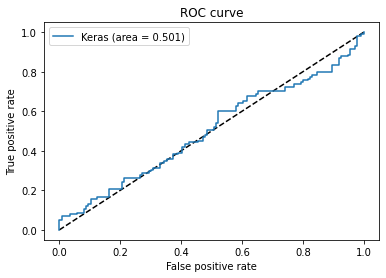

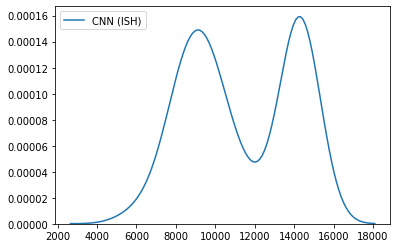

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_ish_dataset, np_ish_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# calculating accuracy and l2 distance
predictions = []
x_test_adv_formatted = []
distances = []
for index, i in enumerate(x_test_adv):
  im = i/255
  rgb = cv2.merge((im,im,im)) # converting (400, 400, 1) to (400, 400, 3)
  #plt.imshow(rgb)
  #plt.show()
  rgb = rgb.astype(np.float32)
  gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  auto = auto_canny(blurred)
  auto_3d = np.stack((auto,)*3, axis=-1)
  resized_image = cv2.resize(rgb, (32, 32))
  resized_auto_3d = cv2.resize(auto_3d,(32, 32))
  final_test_image = np.concatenate((resized_image, resized_auto_3d), axis=0)
  final_test_image = final_test_image[None, ...]
  #print("prediction: " + str(cnn.predict(final_test_image)))
  prediction = cnn.predict(final_test_image)
  predictions.append(float(prediction))
  x_test_adv_formatted.append(final_test_image[0])
  distance = l2(x_test[index], final_test_image[0])
  distances.append(distance)
print("average accuracy on adversarial examples: " + str(statistics.mean(predictions)))
print("average l2 distance: " + str(statistics.mean(distances)))
# ROC Curve
x_test_adv_formatted = np.array(x_test_adv_formatted)
y_pred_keras = cnn.predict(x_test_adv_formatted).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

g = sns.kdeplot(distances, label="CNN (ISH)")
g.legend()
np.savez('/content/cnnish.npz', method='plot', args=(distances), kwargs=dict())

### MLP SVM

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

from art.attacks.evasion import UniversalPerturbation
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

svm_labels = []

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([1])
  else:
    svm_labels.append([0])

svm_labels = np.asarray(svm_labels)

x_train, x_test, y_train, y_test = train_test_split(svm_adversarial_dataset, svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

y_train_new = []
y_test_new = []

# modifying y to be one-hot
for index, i in enumerate(y_train):
  if(int(i) == 1):
    y_train_new.append([0, 1])
  else:
    y_train_new.append([1, 0])

for index, i in enumerate(y_test):
  if(int(i) == 1):
    y_test_new.append([0, 1])
  else:
    y_test_new.append([1, 0]) 

y_train_new = np.asarray(y_train_new)
y_test_new = np.asarray(y_test_new)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test_new = y_test_new.astype(np.float32)
y_train_new = y_train_new.astype(np.float32)
# Step 2: Create the model
min_pixel_value = float(0)
max_pixel_value = float(255)
model = Sequential()
model.add(Flatten(input_shape=(400, 400, 1)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)
# Step 4: Train the ART classifier

classifier.fit(x_train, y_train_new, batch_size=64, nb_epochs=70)

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = UniversalPerturbation(classifier, attacker="fgsm", attacker_params={"eps" : 50}, delta=0.0, max_iter=250, eps=64, norm=np.inf) # using fgsm for now, this has more params you can play with
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))




Epoch 1/70
17/17 [==============================] - 2s 95ms/step - loss: 1702.5508 - accuracy: 0.5083
Epoch 2/70
17/17 [==============================] - 1s 83ms/step - loss: 101.8044 - accuracy: 0.5156
Epoch 3/70
17/17 [==============================] - 1s 82ms/step - loss: 34.3615 - accuracy: 0.4890
Epoch 4/70
17/17 [==============================] - 1s 82ms/step - loss: 16.5001 - accuracy: 0.5460
Epoch 5/70
17/17 [==============================] - 1s 84ms/step - loss: 7.1755 - accuracy: 0.5064
Epoch 6/70
17/17 [==============================] - 1s 81ms/step - loss: 1.0280 - accuracy: 0.5046
Epoch 7/70
17/17 [==============================] - 1s 84ms/step - loss: 0.9820 - accuracy: 0.5285
Epoch 8/70
17/17 [==============================] - 1s 83ms/step - loss: 0.6826 - accuracy: 0.5248
Epoch 9/70
17/17 [==============================] - 1s 82ms/step - loss: 0.6912 - accuracy: 0.5671
Epoch 10/70
17/17 [==============================] - 1s 82ms/step - loss: 0.6520 - accuracy: 0.5965
Ep


Universal perturbation: 0it [00:00, ?it/s]
Universal perturbation: 1it [00:04,  4.84s/it]
Universal perturbation: 2it [00:10,  5.14s/it]
Universal perturbation: 3it [00:16,  5.33s/it]
Universal perturbation: 4it [00:22,  5.47s/it]
Universal perturbation: 5it [00:28,  5.56s/it]
Universal perturbation: 6it [00:33,  5.64s/it]
Universal perturbation: 7it [00:39,  5.70s/it]
Universal perturbation: 8it [00:45,  5.73s/it]
Universal perturbation: 9it [00:51,  5.77s/it]
Universal perturbation: 10it [00:57,  5.88s/it]
Universal perturbation: 11it [01:03,  5.89s/it]
Universal perturbation: 12it [01:09,  5.85s/it]
Universal perturbation: 13it [01:14,  5.83s/it]
Universal perturbation: 14it [01:20,  5.81s/it]
Universal perturbation: 15it [01:26,  5.80s/it]
Universal perturbation: 16it [01:32,  5.79s/it]
Universal perturbation: 17it [01:38,  5.78s/it]
Universal perturbation: 18it [01:43,  5.78s/it]
Universal perturbation: 19it [01:49,  5.78s/it]
Universal perturbation: 20it [01:55,  5.79s/it]
Unive

Accuracy on adversarial test examples: 100.0%


ValueError: ignored

average accuracy on adversarial examples: 0.7873362393750029
average l2 distance: 9440.694


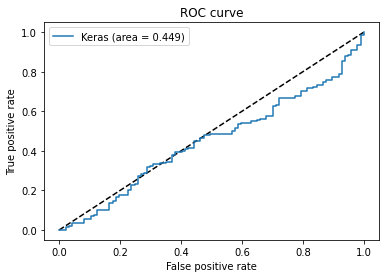

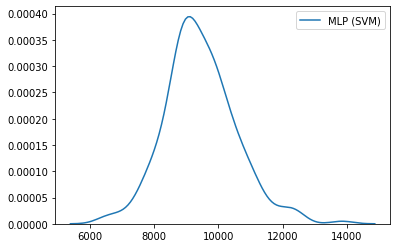

In [ ]:
# loading the original SVM dataset for l2 distance calculation
x_train, x_test, y_train, y_test = train_test_split(np_svm_dataset, np_svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# calculating accuracy and l2 distance
predictions = []
x_test_adv_formatted = []
distances = []
for index, i in enumerate(x_test_adv):
  im = i/255
  rgb = cv2.merge((im,im,im)) # converting (400, 400, 1) to (400, 400, 3)
  #plt.imshow(rgb)
  #plt.show()
  rgb = rgb.astype(np.float32)
  gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  auto = auto_canny(blurred)
  auto_3d = np.stack((auto,)*3, axis=-1)
  resized_image = cv2.resize(rgb, (32, 32))
  resized_auto_3d = cv2.resize(auto_3d,(32, 32))
  final_test_image = np.concatenate((resized_image, resized_auto_3d), axis=0)
  final_test_image = final_test_image[None, ...]
  #print("prediction: " + str(cnn.predict(final_test_image)))
  prediction = mlpsvm.predict(final_test_image)
  predictions.append(float(prediction))
  x_test_adv_formatted.append(final_test_image[0])
  distance = l2(x_test[index], final_test_image[0])
  distances.append(distance)

print("average accuracy on adversarial examples: " + str(statistics.mean(predictions)))
print("average l2 distance: " + str(statistics.mean(distances)))

# ROC Curve
x_test_adv_formatted = np.array(x_test_adv_formatted)
y_pred_keras = cnn.predict(x_test_adv_formatted).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

g = sns.kdeplot(distances, label="MLP (SVM)")
g.legend()
np.savez('/content/mlpsvm.npz', method='plot', args=(distances), kwargs=dict())

### CNN SVM

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

from art.attacks.evasion import UniversalPerturbation
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

svm_labels = []

for i in range(0, 1594):
  if(i <= 810):
    svm_labels.append([1])
  else:
    svm_labels.append([0])

svm_labels = np.asarray(svm_labels)

x_train, x_test, y_train, y_test = train_test_split(svm_adversarial_dataset, svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

y_train_new = []
y_test_new = []

# modifying y to be one-hot
for index, i in enumerate(y_train):
  if(int(i) == 1):
    y_train_new.append([0, 1])
  else:
    y_train_new.append([1, 0])

for index, i in enumerate(y_test):
  if(int(i) == 1):
    y_test_new.append([0, 1])
  else:
    y_test_new.append([1, 0]) 

y_train_new = np.asarray(y_train_new)
y_test_new = np.asarray(y_test_new)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test_new = y_test_new.astype(np.float32)
y_train_new = y_train_new.astype(np.float32)
# Step 2: Create the model
min_pixel_value = float(0)
max_pixel_value = float(255)
model = Sequential()
model.add(Conv2D(32, (7, 7), activation='relu', input_shape=(400, 400, 1)))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5, input_shape=(768,)))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.5, input_shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)
# Step 4: Train the ART classifier

classifier.fit(x_train, y_train_new, batch_size=64, nb_epochs=70)

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = UniversalPerturbation(classifier, attacker="fgsm", attacker_params={"eps" : 50}, delta=0.0, max_iter=250, eps=64, norm=np.inf) # using fgsm for now, this has more params you can play with
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test_new, axis=1)) / len(y_test_new)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))



Epoch 1/70
17/17 [==============================] - 3s 160ms/step - loss: 4.3200 - accuracy: 0.4926
Epoch 2/70
17/17 [==============================] - 2s 135ms/step - loss: 0.6672 - accuracy: 0.5836
Epoch 3/70
17/17 [==============================] - 2s 133ms/step - loss: 0.6044 - accuracy: 0.6645
Epoch 4/70
17/17 [==============================] - 2s 133ms/step - loss: 0.5798 - accuracy: 0.6875
Epoch 5/70
17/17 [==============================] - 2s 134ms/step - loss: 0.5464 - accuracy: 0.7178
Epoch 6/70
17/17 [==============================] - 2s 134ms/step - loss: 0.5347 - accuracy: 0.7316
Epoch 7/70
17/17 [==============================] - 2s 136ms/step - loss: 0.5042 - accuracy: 0.7546
Epoch 8/70
17/17 [==============================] - 2s 134ms/step - loss: 0.6221 - accuracy: 0.6544
Epoch 9/70
17/17 [==============================] - 2s 133ms/step - loss: 0.5492 - accuracy: 0.7206
Epoch 10/70
17/17 [==============================] - 2s 133ms/step - loss: 0.5623 - accuracy: 0.6958


Universal perturbation: 0it [00:00, ?it/s]
Universal perturbation: 1it [00:03,  3.99s/it]
Universal perturbation: 2it [00:08,  4.23s/it]
Universal perturbation: 3it [00:13,  4.34s/it]
Universal perturbation: 4it [00:18,  4.45s/it]
Universal perturbation: 5it [00:22,  4.56s/it]
Universal perturbation: 6it [00:27,  4.59s/it]
Universal perturbation: 7it [00:32,  4.60s/it]
Universal perturbation: 8it [00:36,  4.60s/it]
Universal perturbation: 9it [00:41,  4.59s/it]
Universal perturbation: 10it [00:45,  4.61s/it]
Universal perturbation: 11it [00:50,  4.71s/it]
Universal perturbation: 12it [00:55,  4.76s/it]
Universal perturbation: 13it [01:00,  4.75s/it]
Universal perturbation: 14it [01:05,  4.70s/it]
Universal perturbation: 15it [01:10,  4.77s/it]
Universal perturbation: 16it [01:14,  4.82s/it]
Universal perturbation: 17it [01:19,  4.81s/it]
Universal perturbation: 18it [01:24,  4.78s/it]
Universal perturbation: 19it [01:29,  4.76s/it]
Universal perturbation: 20it [01:34,  4.78s/it]
Unive

Accuracy on adversarial test examples: 0.41841004184100417%


average accuracy on adversarial examples: 0.023742061458905783
average l2 distance: 9628.61


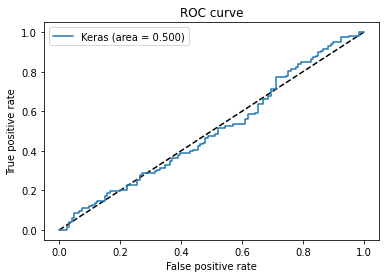

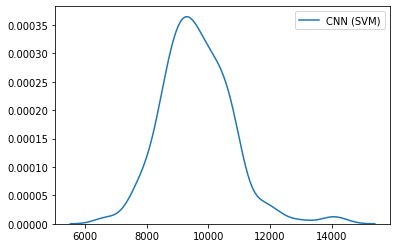

In [ ]:
# loading the original SVM dataset for l2 distance calculation
x_train, x_test, y_train, y_test = train_test_split(np_svm_dataset, np_svm_labels, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# calculating accuracy and l2 distance
predictions = []
x_test_adv_formatted = []
distances = []
for index, i in enumerate(x_test_adv):
  im = i/255
  rgb = cv2.merge((im,im,im)) # converting (400, 400, 1) to (400, 400, 3)
  #plt.imshow(rgb)
  #plt.show()
  rgb = rgb.astype(np.float32)
  gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  auto = auto_canny(blurred)
  auto_3d = np.stack((auto,)*3, axis=-1)
  resized_image = cv2.resize(rgb, (32, 32))
  resized_auto_3d = cv2.resize(auto_3d,(32, 32))
  final_test_image = np.concatenate((resized_image, resized_auto_3d), axis=0)
  final_test_image = final_test_image[None, ...]
  #print("prediction: " + str(cnn.predict(final_test_image)))
  prediction = cnnsvm.predict(final_test_image)
  predictions.append(float(prediction))
  x_test_adv_formatted.append(final_test_image[0])
  distance = l2(x_test[index], final_test_image[0])
  distances.append(distance)

print("average accuracy on adversarial examples: " + str(statistics.mean(predictions)))
print("average l2 distance: " + str(statistics.mean(distances)))
# ROC Curve
x_test_adv_formatted = np.array(x_test_adv_formatted)
y_pred_keras = cnn.predict(x_test_adv_formatted).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

g = sns.kdeplot(distances, label="CNN (SVM)")
g.legend()
np.savez('/content/cnnsvm.npz', method='plot', args=(distances), kwargs=dict())

In [ ]:
mlp_ish = np.load("mlpish.npz")
cnn_ish = np.load("cnnish.npz")
mlp_svm = np.load("mlpsvm.npz")
cnn_svm = np.load("cnnsvm.npz")


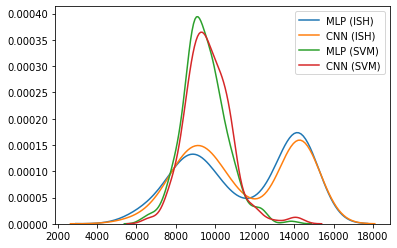

In [ ]:
print()
g1 = sns.kdeplot(mlp_ish['args'], label="MLP (ISH)")
g2 = sns.kdeplot(cnn_ish['args'], label="CNN (ISH)")
g3 = sns.kdeplot(mlp_svm['args'], label="MLP (SVM)")
g4 = sns.kdeplot(cnn_svm['args'], label="CNN (SVM)")
g1.legend()
g2.legend()
g3.legend()
g4.legend()